### Load Packages

In [1]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


### Candidate Features

Here we list out all candidate features for our model. 

In [3]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',
    #Hospital Utilization & Access to Care
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',       
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

116

# EDA

### # of nulls by columns

In [64]:
pd.set_option('display.max_rows', 1000)
#pd.reset_option('^display.', silent=True)

In [53]:
null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot = null_value_tot.sort_values(by = 'num_nulls',ascending=False)
null_value_tot['pct_of_responses_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)
null_value_tot

,feature,num_nulls,pct_of_responses_null
17,times_with_12plus_alc,7582,0.979460
79,time_since_last_healthcare,7406,0.956724
83,duration_last_healthcare_visit,7406,0.956724
104,months_since_birth,7180,0.927529
16,times_with_8plus_alc,6973,0.900788
82,count_days_seen_doctor_12mo,6858,0.885932
90,over_35_hrs_worked,6491,0.838522
85,have_private_insurance,6077,0.785041
91,work_schedule,6025,0.778323
63,count_minutes_moderate_recreational_activity,5664,0.731688


In [48]:
null_value_tot[null_value_tot['pct_of_responses_null'] > 0.5].shape

(38, 3)

In [54]:
null_value_tot[null_value_tot['feature'] == "months_since_birth"]

,feature,num_nulls,pct_of_responses_null
104,months_since_birth,7180,0.927529


<Axes: xlabel='pct_of_responses_null', ylabel='Count'>

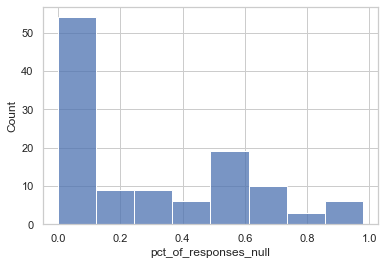

In [49]:
sns.histplot(null_value_tot['pct_of_responses_null'])

## EDA on features

better understand features & how target looks across ones

In [68]:
univariate[univariate['num_responses'] >= 50]

NameError: name 'univariate' is not defined

In [73]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD'):
    
    col_std = pd.DataFrame(columns=['feature','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        print(f"\n{col}\n")
        print(univariate)
        
        column_traits = pd.DataFrame({
            'feature':[col],
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate[univariate['num_responses'] >= 30].shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        
        col_std = pd.concat([col_std,column_traits])
        
    return col_std
        
univariate_stats = univariate_analysis(columns=candidate_features)


little_interest_in_doing_things

   col_value  pct_target  num_responses
0        0.0    0.059163           5375
1        1.0    0.166320           1443
2        2.0    0.179601            451
3        3.0    0.258706            402

feeling_down_depressed_hopeless

   col_value  pct_target  num_responses
0        0.0    0.050074           5432
1        1.0    0.175738           1525
2        2.0    0.225316            395
3        3.0    0.351097            319

trouble_falling_or_staying_asleep

   col_value  pct_target  num_responses
0        0.0    0.059644           4376
1        1.0    0.108974           1872
2        2.0    0.170103            582
3        3.0    0.210651            845

feeling_tired_or_having_little_energy

   col_value  pct_target  num_responses
0        0.0    0.041215           3227
1        1.0    0.095186           2763
2        2.0    0.146310            786
3        3.0    0.257492            901

poor_appetitie_or_overeating

   col_value  pct_target 


high_bp_prescription

   col_value  pct_target  num_responses
0        1.0    0.138389           2558
1        2.0    0.101010            396

high_cholesterol

   col_value  pct_target  num_responses
0        1.0     0.13582           2842
1        2.0     0.07302           4848

cholesterol_prescription

   col_value  pct_target  num_responses
0        1.0    0.150297           2189
1        2.0    0.081376           4215

has_overweight_diagnosis

   col_value  pct_target  num_responses
0        0.0    0.073204           4344
1        1.0    0.127986           3391

height_in

    col_value  pct_target  num_responses
0        48.0    0.000000              3
1        49.0    0.000000              2
2        50.0    0.000000              1
3        51.0    0.500000              2
4        53.0    0.000000              9
5        54.0    0.000000              6
6        55.0    0.142857             14
7        56.0    0.034483             29
8        57.0    0.150000             60
9 


    col_value  pct_target  num_responses
0         1.0    0.000000             34
1         2.0    0.160000             25
2         3.0    0.115385             26
3         4.0    0.000000             21
4         5.0    0.000000             32
5         6.0    0.000000             17
6         7.0    0.000000             22
7         8.0    0.041667             24
8         9.0    0.000000             32
9        10.0    0.000000             24
10       11.0    0.000000             24
11       12.0    0.000000             37
12       13.0    0.062500             16
13       14.0    0.000000             24
14       15.0    0.000000             31
15       16.0    0.037037             27
16       17.0    0.080000             25
17       18.0    0.066667             15
18       19.0    0.047619             21
19       20.0    0.080000             25
20       21.0    0.133333             15
21       22.0    0.000000              9
22       23.0    0.000000             16
23       24.0  

In [74]:
univariate_data = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_data

,feature,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_of_responses_null
0,little_interest_in_doing_things,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
1,feeling_down_depressed_hopeless,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
2,trouble_falling_or_staying_asleep,0.066556,0.059644,0.210651,4,MDD,0.151007,66,0.008526
3,feeling_tired_or_having_little_energy,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
4,poor_appetitie_or_overeating,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
5,feeling_bad_about_yourself,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
7,moving_or_speaking_to_slowly_or_fast,0.081422,0.080914,0.276730,4,MDD,0.195816,65,0.008397
8,thoughts_you_would_be_better_off_dead,0.115184,0.088590,0.355556,4,MDD,0.266965,67,0.008655
9,difficult_doing_daytoday_tasks,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058


In [75]:
univariate_data.sort_values(by = 'max_minus_min', ascending=False)

,feature,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_of_responses_null
9,difficult_doing_daytoday_tasks,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058
1,feeling_down_depressed_hopeless,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
81,seen_mental_health_professional,0.197384,0.069421,0.348564,2,MDD,0.279143,3,0.000388
49,age_hypertension,0.059984,0.032258,0.309524,40,MDD,0.277266,4598,0.593980
8,thoughts_you_would_be_better_off_dead,0.115184,0.088590,0.355556,4,MDD,0.266965,67,0.008655
5,feeling_bad_about_yourself,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
3,feeling_tired_or_having_little_energy,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
0,little_interest_in_doing_things,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
4,poor_appetitie_or_overeating,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
